In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Was large hence imported in chunks

In [2]:
# read the large csv file with specified chunksize 
df_chunk = pd.read_csv(r'E:/Chrome/loan/loan.csv', chunksize=10000,low_memory=False,parse_dates=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d','next_pymnt_d'])



In [3]:
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in df_chunk:  
    chunk_list.append(chunk)
    


In [4]:
df_concats = pd.concat(chunk_list)

In [5]:
df_concats

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [6]:
data=df_concats.copy()

In [7]:
## Checking for missing data  

data_missing=data.isnull().sum()
data_missing_per=100*data.isnull().sum()/len(data)
data_df=pd.concat([data_missing,data_missing_per],axis=1)
data_df.columns=['missing count','percentage missing']

In [8]:
data_df.sort_values(by='percentage missing',ascending=False)

,missing count,percentage missing
dti_joint,886870,99.942640
annual_inc_joint,886868,99.942415
verification_status_joint,886868,99.942415
il_util,868762,97.902024
mths_since_rcnt_il,866569,97.654892
...,...,...
total_pymnt,0,0.000000
total_pymnt_inv,0,0.000000
total_rec_prncp,0,0.000000
total_rec_int,0,0.000000


### Deleting Columns with more than 55% null values

In [9]:
data_df[data_df['percentage missing']>55].index

Index(['desc', 'mths_since_last_record', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [10]:
data.drop(data_df[data_df['percentage missing']>55].index,axis=1,inplace=True)

In [11]:
data_df.drop(data_df[data_df['percentage missing']>55].index , inplace=True)

In [12]:
data_df.sort_values(by='percentage missing',ascending=False)

,missing count,percentage missing
mths_since_last_delinq,454312,51.197065
next_pymnt_d,252971,28.507661
tot_cur_bal,70276,7.919502
tot_coll_amt,70276,7.919502
total_rev_hi_lim,70276,7.919502
emp_title,51462,5.799326
emp_length,44825,5.051393
last_pymnt_d,17659,1.990018
revol_util,502,0.056571
title,152,0.017129


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          887379 non-null  int64         
 1   member_id                   887379 non-null  int64         
 2   loan_amnt                   887379 non-null  float64       
 3   funded_amnt                 887379 non-null  float64       
 4   funded_amnt_inv             887379 non-null  float64       
 5   term                        887379 non-null  object        
 6   int_rate                    887379 non-null  float64       
 7   installment                 887379 non-null  float64       
 8   grade                       887379 non-null  object        
 9   sub_grade                   887379 non-null  object        
 10  emp_title                   835917 non-null  object        
 11  emp_length                  842554 non-

### From all these features we shall keep the once that will be present in application form and remove the rest which wont be avaible before lending the loan

In [14]:
req_features=['id','loan_amnt','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership',
              'annual_inc','verification_status','issue_d','loan_status','purpose','title','zip_code','addr_state','dti',
              'earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status',
              'application_type']

In [15]:
drop_features=[col for col in data.columns if col not in req_features]

In [16]:
data.drop(drop_features,axis=1,inplace=True)

In [17]:
data.dtypes.value_counts()

object            14
float64           10
datetime64[ns]     2
int64              1
dtype: int64

### Dropping few columns that dont provide much information

In [18]:
data.drop(['id','title','emp_title'],axis=1,inplace=True)

### Checking the number of categories each object varible has

In [19]:
col_list=data.select_dtypes(include='object').columns
type(col_list)

pandas.core.indexes.base.Index

In [20]:
object_ser=pd.Series(index=col_list)

D:\Installation\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [21]:
for i in col_list:
    object_ser[i]=data[i].nunique()

In [22]:
object_ser

term                     2.0
grade                    7.0
sub_grade               35.0
emp_length              11.0
home_ownership           6.0
verification_status      3.0
loan_status             10.0
purpose                 14.0
zip_code               935.0
addr_state              51.0
initial_list_status      2.0
application_type         2.0
dtype: float64

In [23]:
data['application_type'].value_counts()

INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64

### we can drop application_type as almost all are same

In [24]:
data.drop('application_type',axis=1,inplace=True)

In [25]:
data['home_ownership'].value_counts()


MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

In [26]:
data['purpose'].value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

In [27]:
data['term'].value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [28]:
data['zip_code'].value_counts()

945xx    9770
750xx    9417
112xx    9272
606xx    8641
300xx    8126
         ... 
643xx       1
569xx       1
507xx       1
524xx       1
901xx       1
Name: zip_code, Length: 935, dtype: int64

### Dropping Zipcode as there are quite a lot of zip code 

In [29]:
data.drop('zip_code',axis=1,inplace=True)

In [30]:
data['pub_rec'].value_counts()

0.0     751572
1.0     113266
2.0      14854
3.0       4487
4.0       1564
5.0        757
6.0        385
7.0        170
8.0        113
9.0         50
10.0        42
11.0        23
12.0        16
13.0        12
15.0         6
18.0         5
16.0         5
21.0         4
17.0         3
14.0         2
49.0         2
19.0         2
40.0         1
86.0         1
20.0         1
23.0         1
63.0         1
22.0         1
28.0         1
34.0         1
26.0         1
54.0         1
Name: pub_rec, dtype: int64

In [31]:
data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

### we want to identify only between curren fully paid so we can remove rest

In [32]:
data=data[(data.loan_status=='Fully Paid') | (data.loan_status=='Charged Off')]

In [33]:
data['pub_rec'].value_counts()

0.0     222043
1.0      27332
2.0       2547
3.0        676
4.0        202
5.0         92
6.0         39
7.0         19
8.0          8
9.0          5
10.0         5
11.0         1
12.0         1
15.0         1
Name: pub_rec, dtype: int64

In [34]:
data['initial_list_status'].value_counts()

f    182079
w     70892
Name: initial_list_status, dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252971 entries, 0 to 887371
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   loan_amnt            252971 non-null  float64       
 1   term                 252971 non-null  object        
 2   int_rate             252971 non-null  float64       
 3   installment          252971 non-null  float64       
 4   grade                252971 non-null  object        
 5   sub_grade            252971 non-null  object        
 6   emp_length           243074 non-null  object        
 7   home_ownership       252971 non-null  object        
 8   annual_inc           252971 non-null  float64       
 9   verification_status  252971 non-null  object        
 10  issue_d              252971 non-null  datetime64[ns]
 11  loan_status          252971 non-null  object        
 12  purpose              252971 non-null  object        
 13  addr_state    

## Loan Amount

[]

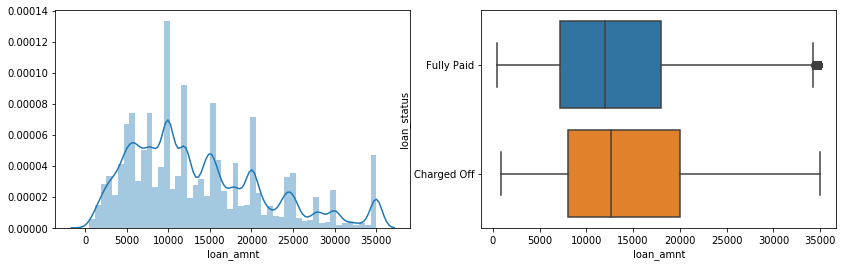

In [37]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(data['loan_amnt'])
plt.subplot(1,2,2)
sns.boxplot(x='loan_amnt' ,y='loan_status',data=data)
plt.plot()

In [38]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,45248.0,14556.293096,8393.421467,900.0,8000.0,12675.0,20000.0,35000.0
Fully Paid,207723.0,13346.350910,8057.388288,500.0,7200.0,12000.0,18000.0,35000.0


## Mostly loan is from 5000 to 20000 

## Term

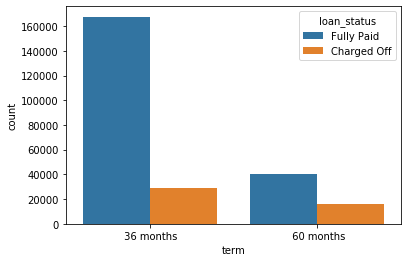

In [40]:
sns.countplot('term',data=data, hue='loan_status')

In [41]:
data['term'].value_counts()

 36 months    196658
 60 months     56313
Name: term, dtype: int64

In [42]:
data.groupby(['term'])['loan_status'].value_counts(normalize=True)

term        loan_status
 36 months  Fully Paid     0.852114
            Charged Off    0.147886
 60 months  Fully Paid     0.712944
            Charged Off    0.287056
Name: loan_status, dtype: float64

### Term of 60 months are more likely to be charged off as compare to 36 months 

### Int_rate

In [44]:
data.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,45248.0,16.015850,4.303637,5.42,13.05,15.80,18.92,28.99
Fully Paid,207723.0,13.274244,4.268371,5.32,10.16,13.11,15.81,28.99


[]

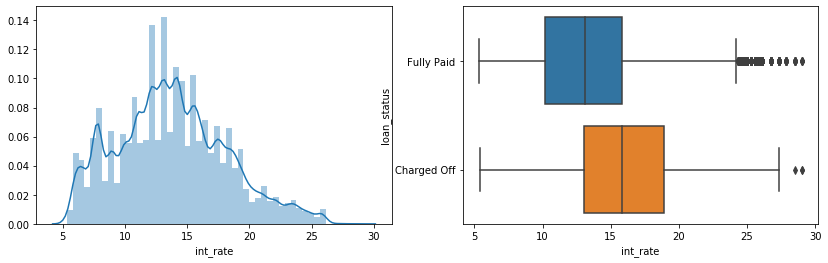

In [45]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(data['int_rate'])
plt.subplot(1,2,2)
sns.boxplot(x='int_rate' ,y='loan_status',data=data)
plt.plot()

### greater int rate are more likely to be charged off

## Installment

[]

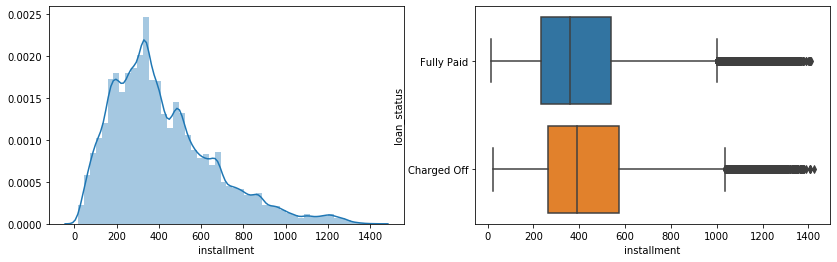

In [46]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(data['installment'])
plt.subplot(1,2,2)
sns.boxplot(x='installment' ,y='loan_status',data=data)
plt.plot()

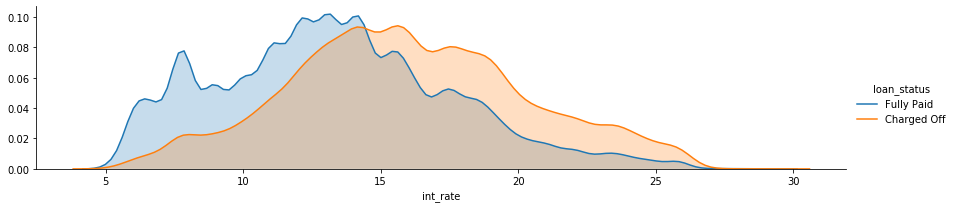

In [47]:
facet = sns.FacetGrid(data, hue = 'loan_status',aspect=4)
facet.map(sns.kdeplot, 'int_rate', shade=True)
facet.add_legend()

### Charged off tends to have higher installments

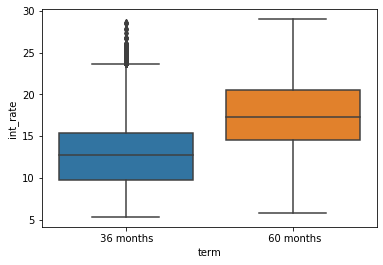

In [48]:
sns.boxplot(x='term' ,y='int_rate',data=data)

### Large terms have high intrest rate

## Grade SubGrade int rate

In [49]:
data['grade'].value_counts()

B    76065
C    65320
A    42296
D    40506
E    19186
F     7660
G     1938
Name: grade, dtype: int64

In [50]:
df_grade = data.groupby(['grade', 'sub_grade']).size().reset_index().pivot(columns='grade', index='sub_grade', values=0)

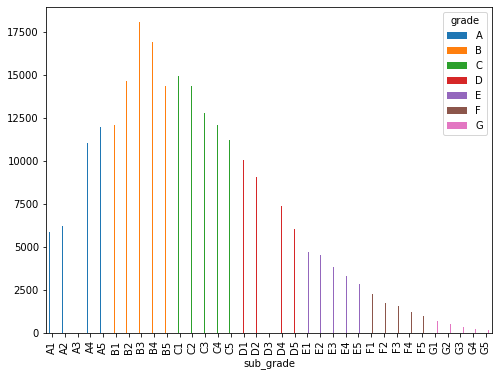

In [51]:

df_grade.plot(kind='bar',figsize=[8,6])

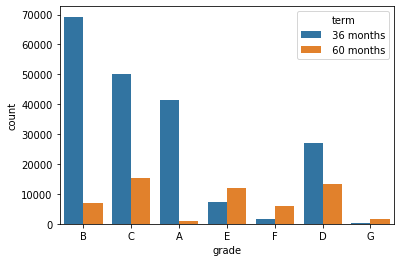

In [52]:
sns.countplot('grade',hue='term',data=data)

### As the term increases Grade also increases

In [53]:
data.groupby(['grade','loan_status']).size()

grade  loan_status
A      Charged Off     2617
       Fully Paid     39679
B      Charged Off     9519
       Fully Paid     66546
C      Charged Off    12642
       Fully Paid     52678
D      Charged Off    10486
       Fully Paid     30020
E      Charged Off     6258
       Fully Paid     12928
F      Charged Off     2934
       Fully Paid      4726
G      Charged Off      792
       Fully Paid      1146
dtype: int64

### As per desc Grade is categorization of int_rate and also sub categorized to sub grades 

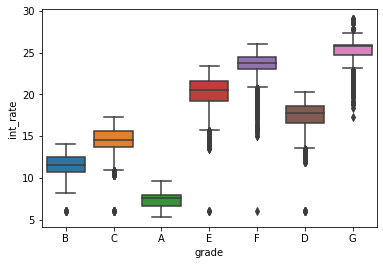

In [54]:
sns.boxplot(x='grade' ,y='int_rate',data=data)

### As the Grade increase interest increases

###  emp_length

In [55]:
data['emp_length'].value_counts()

10+ years    76881
2 years      23561
< 1 year     20886
3 years      20380
5 years      18059
1 year       16856
4 years      16197
6 years      14753
7 years      14085
8 years      11849
9 years       9567
Name: emp_length, dtype: int64

In [56]:
data['emp_length'].replace({'10+ years':10,'2 years':2,'< 1 year':1,'3 years':3,'5 years':5,'1 year':1,'4 years':4,'6 years':6
                            ,'7 years':7,'8 years':8,'9 years':9},inplace=True)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

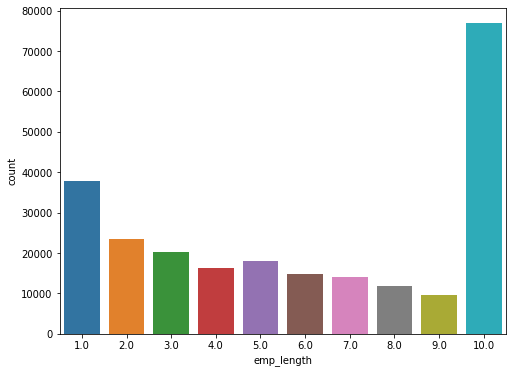

In [57]:
plt.figure(figsize=[8,6])
sns.countplot(data['emp_length'])
plt.plot

In [58]:
data['emp_length'].fillna(data.emp_length.median(),inplace=True)

In [59]:
data['emp_length'].isnull().sum()

0

[]

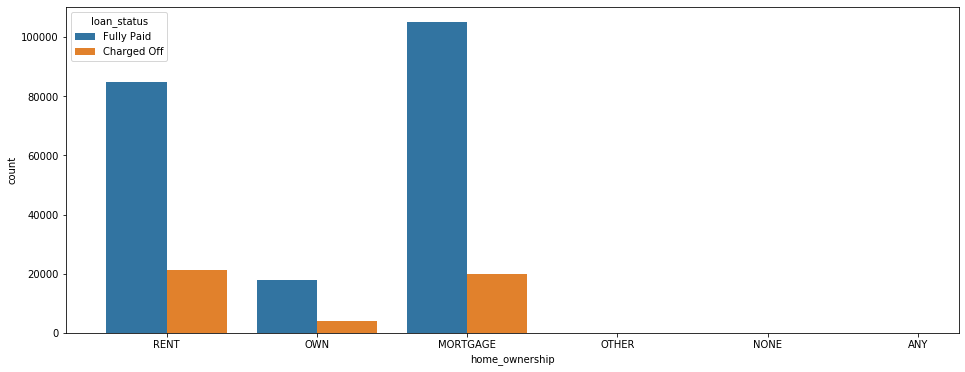

In [60]:
plt.figure(figsize=[16,6])
sns.countplot('home_ownership',data=data,hue='loan_status')
plt.plot()

In [61]:
data['home_ownership'].value_counts()

MORTGAGE    124844
RENT        105957
OWN          21985
OTHER          141
NONE            43
ANY              1
Name: home_ownership, dtype: int64

### here we can remove last 3 categories as the data is alomost negligible in them

In [62]:
index_name=data[(data.home_ownership=='OTHER')|(data.home_ownership=='NONE')|(data.home_ownership=='ANY')].index


In [63]:
index_name

Int64Index([ 13746,  32686,  32774,  33941,  34721,  34863,  34870,  34903,
             35015,  35060,
            ...
            186814, 186874, 186892, 186901, 186904, 186918, 187030, 187214,
            227181, 311334],
           dtype='int64', length=185)

In [64]:
data.drop(index_name,inplace=True)

In [65]:
data['home_ownership'].value_counts()

MORTGAGE    124844
RENT        105957
OWN          21985
Name: home_ownership, dtype: int64

## steps to create countplot with stacked columns

In [66]:
data.groupby(['loan_status', 'home_ownership']).size()

loan_status  home_ownership
Charged Off  MORTGAGE           19878
             OWN                 4025
             RENT               21311
Fully Paid   MORTGAGE          104966
             OWN                17960
             RENT               84646
dtype: int64

In [67]:
data.groupby(['loan_status', 'home_ownership']).size().reset_index()

,loan_status,home_ownership,0
0,Charged Off,MORTGAGE,19878
1,Charged Off,OWN,4025
2,Charged Off,RENT,21311
3,Fully Paid,MORTGAGE,104966
4,Fully Paid,OWN,17960
5,Fully Paid,RENT,84646


In [68]:
df_plot = data.groupby(['loan_status', 'home_ownership']).size().reset_index().pivot(columns='loan_status', index='home_ownership', values=0)

In [69]:
df_plot

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,19878,104966
OWN,4025,17960
RENT,21311,84646


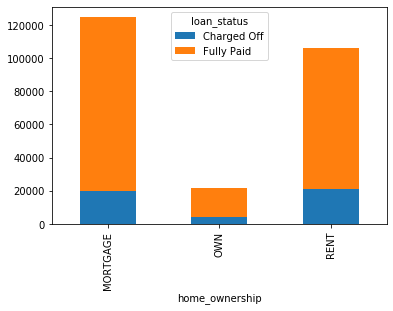

In [70]:
df_plot.plot(kind='bar', stacked=True)

In [71]:
## annual_inc

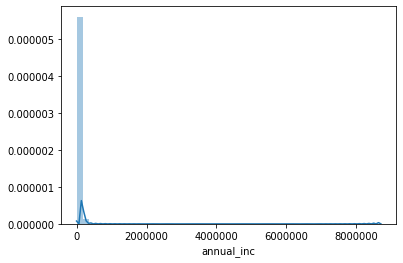

In [72]:
sns.distplot(data['annual_inc'])

In [73]:
data['annual_inc'].mean()

72542.34992107937

In [74]:
data['annual_inc'].median()

62000.0

In [75]:
data['annual_inc'].describe()

count    2.527860e+05
mean     7.254235e+04
std      5.881596e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.200000e+04
75%      8.700000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

## issue date

In [76]:
data['issue_month']=data.issue_d.dt.month
data['issue_year']=data.issue_d.dt.year

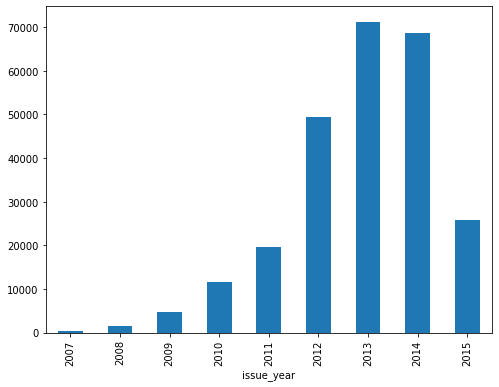

In [77]:
plt.figure(figsize=[8,6])
loan_year=data.groupby('issue_year')['loan_amnt'].count()
loan_year.plot.bar()

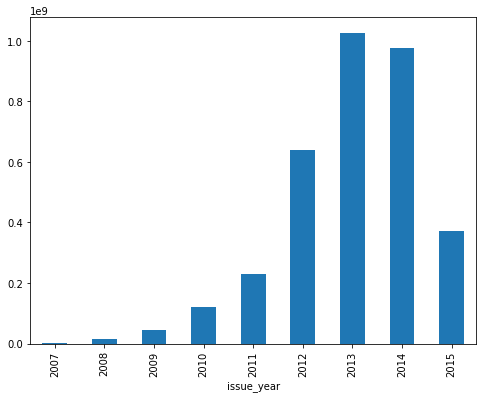

In [78]:
plt.figure(figsize=[8,6])
loan_year=data.groupby('issue_year')['loan_amnt'].sum()
loan_year.plot.bar()

### As we have deleted out 2015 data so we cannot predict for 2015 but for 2013 and 2014 mostly loans are issued

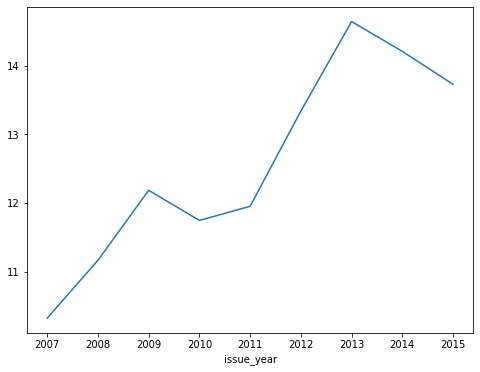

In [79]:
plt.figure(figsize=[8,6])
loan_year=data.groupby('issue_year')['int_rate'].mean()
loan_year.plot()

### Interest rate is increating with years and is highest in 2013 also it has droped for 2014 little bit 

## Purpose

[]

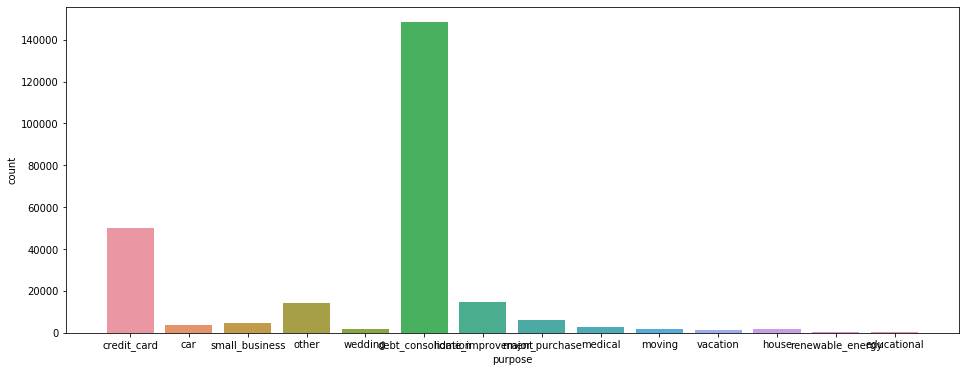

In [80]:
plt.figure(figsize=[16,6])
sns.countplot(data['purpose'])
plt.plot()

[]

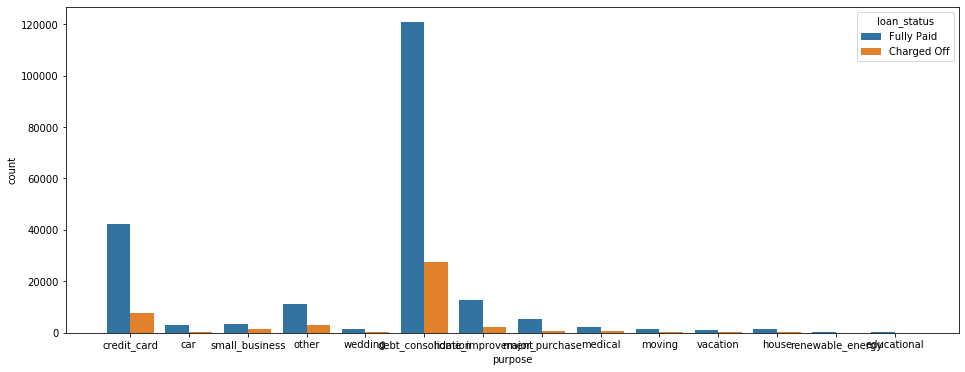

In [81]:
plt.figure(figsize=[16,6])
sns.countplot('purpose',data=data ,hue='loan_status')
plt.plot()

In [82]:
data['purpose'].value_counts()

debt_consolidation    148300
credit_card            50013
home_improvement       14916
other                  14261
major_purchase          6258
small_business          4735
car                     3644
medical                 2851
moving                  2027
wedding                 1954
house                   1651
vacation                1588
educational              322
renewable_energy         266
Name: purpose, dtype: int64

### debt_consolidation is the major purpose of loan 

### dti ::  A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

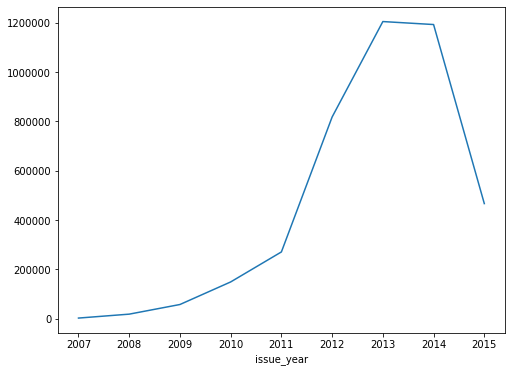

In [83]:
plt.figure(figsize=[8,6])
loan_year=data.groupby('issue_year')['dti'].sum()
loan_year.plot()

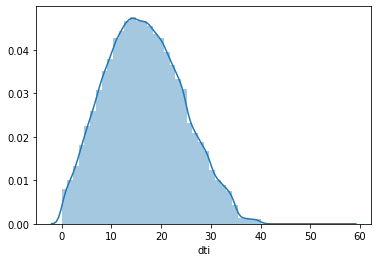

In [84]:
sns.distplot(data['dti'])

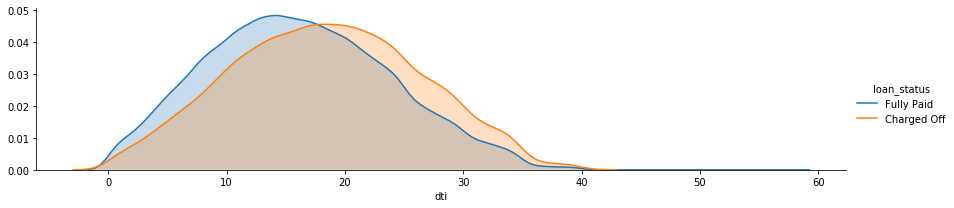

In [85]:
facet = sns.FacetGrid(data, hue = 'loan_status',aspect=4)
facet.map(sns.kdeplot, 'dti', shade=True)
facet.add_legend()

## earliest_cr_line

In [86]:
data.earliest_cr_line.dtype

dtype('<M8[ns]')

[]

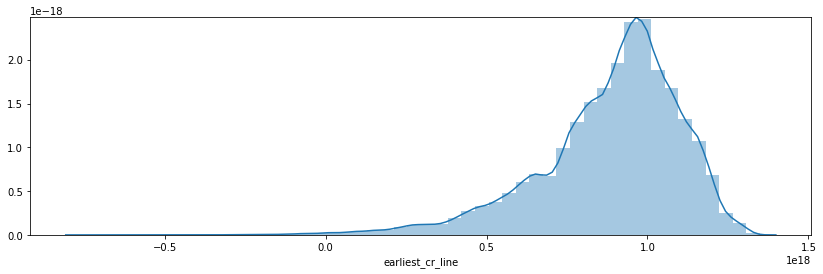

In [87]:
plt.figure(figsize=(14,4))
sns.distplot(data['earliest_cr_line'])
plt.plot()

## pub_rec

In [88]:
data['pub_rec'].value_counts()

0.0     221862
1.0      27328
2.0       2547
3.0        676
4.0        202
5.0         92
6.0         39
7.0         19
8.0          8
9.0          5
10.0         5
11.0         1
12.0         1
15.0         1
Name: pub_rec, dtype: int64

[]

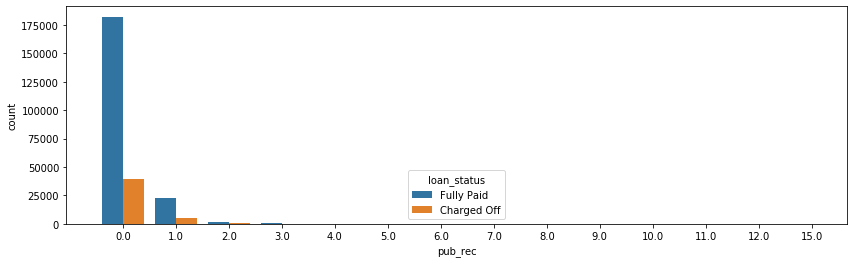

In [89]:
plt.figure(figsize=(14,4))
sns.countplot('pub_rec',hue='loan_status',data=data)
plt.plot()


## revol_bal

[]

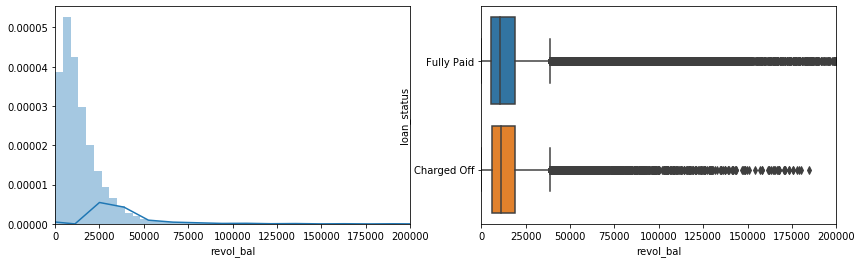

In [90]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(data['revol_bal'],bins=400)
plt.xlim(0,200000)
plt.subplot(1,2,2)
sns.boxplot(x='revol_bal' ,y='loan_status',data=data)
plt.xlim(0,200000)
plt.plot()

## revol_util

[]

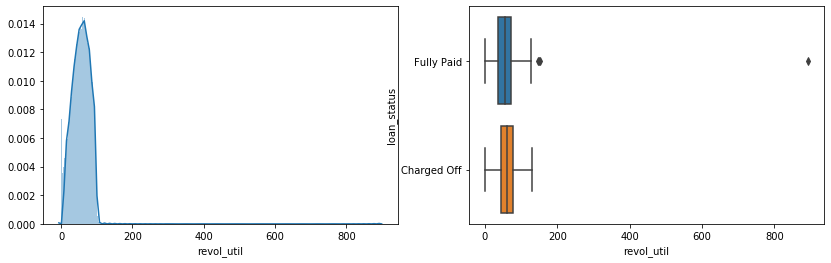

In [91]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(data['revol_util'],bins=400)

plt.subplot(1,2,2)
sns.boxplot(x='revol_util' ,y='loan_status',data=data)

plt.plot()

In [92]:
data['revol_util'].mean()

54.31289545467235

In [93]:
data['revol_util'].median()

55.8

In [94]:
data.groupby(['loan_status'])['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,45167.0,59.479844,23.481011,0.0,43.3,61.6,78.0,129.4
Fully Paid,207422.0,53.187771,24.922178,0.0,34.9,54.5,72.8,892.3


In [95]:
##data.dropna(subset = ["revol_util"], inplace=True)
data['revol_util'].fillna(data.revol_util.median(),inplace=True)

In [96]:
data.corr()['revol_bal']

loan_amnt      0.333837
int_rate       0.021488
installment    0.325086
emp_length     0.096758
annual_inc     0.303778
dti            0.153216
open_acc       0.229805
pub_rec       -0.104959
revol_bal      1.000000
revol_util     0.231797
total_acc      0.206759
issue_month   -0.000737
issue_year     0.036813
Name: revol_bal, dtype: float64

In [97]:
data.corr()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,issue_month,issue_year
loan_amnt,1.000000,0.210969,0.955174,0.114397,0.334379,0.052366,0.202179,-0.075560,0.333837,0.101161,0.232416,-0.018146,0.140617
int_rate,0.210969,1.000000,0.202394,0.030092,-0.025994,0.172110,0.039259,0.082972,0.021488,0.342687,-0.010934,0.003839,0.153349
installment,0.955174,0.202394,1.000000,0.102857,0.329780,0.053531,0.197783,-0.065324,0.325086,0.130309,0.214049,-0.020102,0.137481
emp_length,0.114397,0.030092,0.102857,1.000000,0.073045,0.050249,0.051278,0.047003,0.096758,0.043961,0.135960,0.001056,0.105206
annual_inc,0.334379,-0.025994,0.329780,0.073045,1.000000,-0.171535,0.140010,-0.018656,0.303778,0.024016,0.205707,-0.003258,0.045100
dti,0.052366,0.172110,0.053531,0.050249,-0.171535,1.000000,0.309338,-0.033777,0.153216,0.219597,0.232842,0.005601,0.174539
open_acc,0.202179,0.039259,0.197783,0.051278,0.140010,0.309338,1.000000,-0.012376,0.229805,-0.111622,0.672030,-0.008976,0.158249
pub_rec,-0.075560,0.082972,-0.065324,0.047003,-0.018656,-0.033777,-0.012376,1.000000,-0.104959,-0.064908,0.030584,-0.042991,0.162426
revol_bal,0.333837,0.021488,0.325086,0.096758,0.303778,0.153216,0.229805,-0.104959,1.000000,0.231797,0.206759,-0.000737,0.036813
revol_util,0.101161,0.342687,0.130309,0.043961,0.024016,0.219597,-0.111622,-0.064908,0.231797,1.000000,-0.090695,0.000044,0.018140


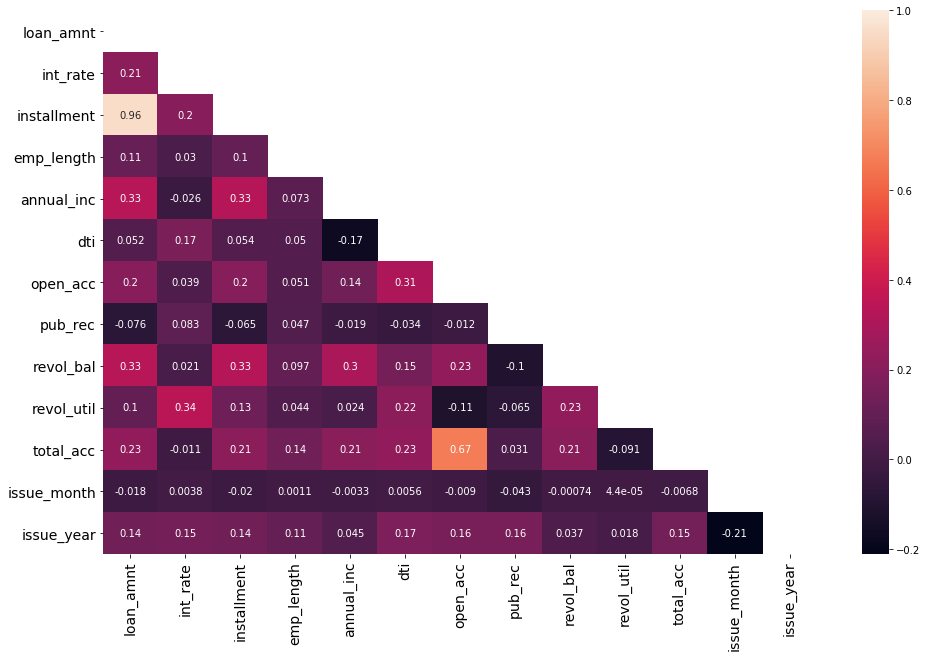

In [98]:
mask =np.zeros_like(data.corr())
indent=np.triu_indices_from(mask)
mask[indent]=True
plt.figure(figsize=[16,10])
sns.heatmap(data.corr(),annot=True,mask=mask, annot_kws={"size":10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## installment is highly correlated with loan amount so we can remove 1
## Total acc is highly corrleated with open account so we can remove 1

In [99]:
data.drop('installment',axis=1,inplace=True)

In [102]:
data.drop('total_acc',axis=1,inplace=True)

In [100]:
data.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
initial_list_status    0
issue_month            0
issue_year             0
dtype: int64

In [103]:
data.to_csv('cleaned_data.csv')